In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split # type: ignore
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import  ConfusionMatrixDisplay, classification_report, confusion_matrix



In [2]:

amostra = pd.read_csv("./conteudo/wine_dataset.csv")

arq = amostra.head()
amostra.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
y = amostra["style"]
x = amostra.drop("style", axis=1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

modelo = tree.ExtraTreeClassifier()
modelo.fit(x_treino, y_treino)
resultado = modelo.score(x_teste, y_teste)
print(f"Acurácia: {resultado * 100:.2f}%")


Acurácia: 97.33%


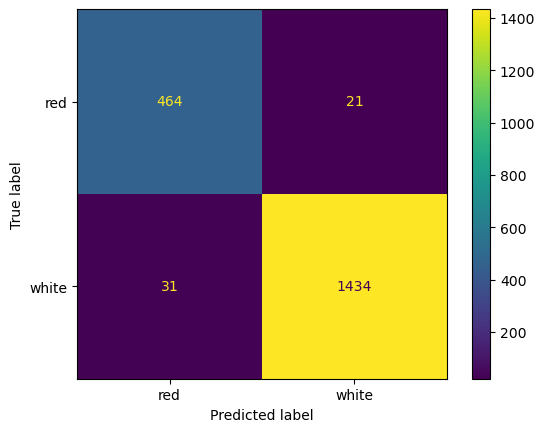

              precision    recall  f1-score   support

         red       0.94      0.96      0.95       485
       white       0.99      0.98      0.98      1465

    accuracy                           0.97      1950
   macro avg       0.96      0.97      0.96      1950
weighted avg       0.97      0.97      0.97      1950



In [4]:

real = y_teste
predicts = modelo.predict((x_teste))


cm = confusion_matrix(real,predicts, labels=modelo.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
display.plot()
plt.show()

print(classification_report(real, predicts))
